In [11]:
from mlrose_hiive import NeuralNetwork
from sklearn.metrics import accuracy_score
import csv
import pandas as pd
import time
import json

In [49]:
def run_neural_network_gd(X_train, y_train, X_test, y_test):
    hidden_nodes = [100, 50, 100]
    results = {}

    start = time.time()
    model = NeuralNetwork(hidden_nodes=hidden_nodes, algorithm='gradient_descent', 
                          max_iters=10, random_state=7, curve=True, max_attempts=10)
    model.fit(X_train, y_train)
    end = time.time()
    y_act = model.predict(X_test)
    results = {
        'loss': model.loss, 
        'curve': model.fitness_curve.tolist(),
        'accuracy': accuracy_score(y_act, y_test),
        'time': end-start
    }
    print(results)
    with open("GD.json", "w+") as f:
        json.dump(results, f, indent=4)



In [50]:
from scipy.io.arff import loadarff 
from sklearn.model_selection import train_test_split

raw_data = loadarff('Training Dataset.arff')
ph_data = pd.DataFrame(raw_data[0])

for var in ph_data.columns.values:
    ph_data[var] = pd.Categorical(ph_data[var])
    ph_data[var] = ph_data[var].cat.codes


y = ph_data.Result.values
X = ph_data.drop(['Result'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

run_neural_network_gd(X_train, y_train, X_test, y_test)

{'loss': 0.6931471805599453, 'curve': [-17.748086544251365, -15.324886498636998, -19.214244670167407, -15.324886498636998, -0.6931471805599453, -0.6931471805599453, -0.6931471805599453, -0.6931471805599453, -0.6931471805599453, -0.6931471805599453], 'accuracy': 0.44052464947987335, 'time': 1.7810933589935303}


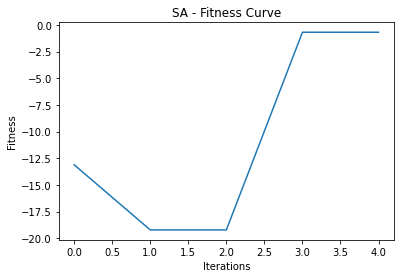

In [32]:
import matplotlib.pyplot as plt

results = None        
with open("GD.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("SA - Fitness Curve")
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")
ax.plot(results['curve'])

plt.savefig("SA_Curve.png")
